In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s1 = pd.Series([1,2,3,9,8])

In [3]:
s2 = pd.Series(["mohit","manish"])

In [4]:
s1

0    1
1    2
2    3
3    9
4    8
dtype: int64

In [5]:
s2

0     mohit
1    manish
dtype: object

In [6]:
s1[0]

1

In [7]:
s1[2]

3

In [8]:
s2[1]

'manish'

In [9]:
#df = pd.DataFrame([{"apple":"a sweet fruit"}])

In [10]:
df = pd.DataFrame({"names":["amit","ameer","gurpreet"],"ages":[19,20,30]})

In [11]:
df

,names,ages
0,amit,19
1,ameer,20
2,gurpreet,30


In [12]:
data = pd.read_csv("../datasets/mnist_train_small.csv")

In [13]:
type(data)

pandas.core.frame.DataFrame

In [14]:
data.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
val = data.values

In [16]:
type(val)

numpy.ndarray

In [17]:
val.shape

(8000, 786)

In [18]:
x = val[:,2:]

In [19]:
y = val[:,1]

In [20]:
img = x[1].reshape(28,28)

In [21]:
img.shape

(28, 28)

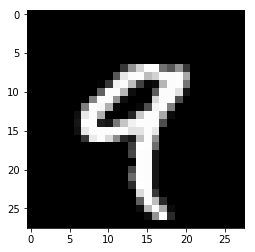

In [22]:
plt.imshow(img,cmap = "gray")

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
class KNN:
    def __init__(self,k=10):
        self.x=None
        self.y=None
        self.k=k
    
    def fit(self,x,y):
        self.x=x
        self.y=y
        
    def predict(self,points):
        
        res = []
        for point in points:
            res.append(self.predict_point(point))
        return np.array(res,dtype = int)  
    
    def predict_point(self,point):
        distances = []
        for x_item,y_item in zip(self.x,self.y):
            dis = KNN.distance(point,x_item)
            distances.append((dis,y_item))
        
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals , counts = np.unique(top[:,1], return_counts=True)
        return vals[np.argmax(counts)]
    
    def accuracy(self,x,y):
       return sum(self.predict(x) == y)/ len(y)
        
        
    @classmethod
    def distance(cls,p1,p2):
        return np.sum((p1 - p2) **2)

In [26]:
model = KNN(10)

In [27]:
model.fit(x_train,y_train)

In [28]:
model.predict(x_test[:10])

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 0])

In [29]:
model.accuracy(x_test[:10],y_test[:10])

0.9